Stole all this information from:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


### Required Parameters:

f : callable:
- The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.

xdata : array_like:
- The independent variable where the data is measured. Should usually be an M-length sequence or an (k,M)-shaped array for functions with k predictors, and each element should be float convertible if it is an array like object.

ydata : array_like:
- The dependent data, a length M array - nominally f(xdata, ...).


### Notes:

- Assumes ydata = f(xdata, *params) + eps
- Returns tuple: popt, pcov

popt: array

- Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.

pcov: 2-D array

- The estimated approximate covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters, use perr = np.sqrt(np.diag(pcov)). Note that the relationship between cov and parameter error estimates is derived based on a linear approximation to the model function around the optimum [1]. When this approximation becomes inaccurate, cov may not provide an accurate measure of uncertainty.
- How the sigma parameter affects the estimated covariance depends on absolute_sigma argument, as described above.
- If the Jacobian matrix at the solution doesn’t have a full rank, then ‘lm’ method returns a matrix filled with np.inf, on the other hand ‘trf’ and ‘dogbox’ methods use Moore-Penrose pseudoinverse to compute the covariance matrix. Covariance matrices with large condition numbers (e.g. computed with numpy.linalg.cond) may indicate that results are unreliable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
# Note that this is an exponential function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

Define the data to be fit with some noise:


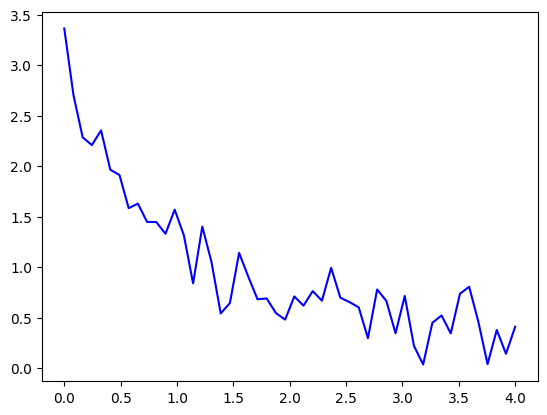

In [9]:
xdata = np.linspace(0, 4, 50)

#The goal here is to find the data values for the coefficients
y = func(xdata, 2.5, 1.3, 0.5)

rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

Fit for the parameters a, b, c of the function func:


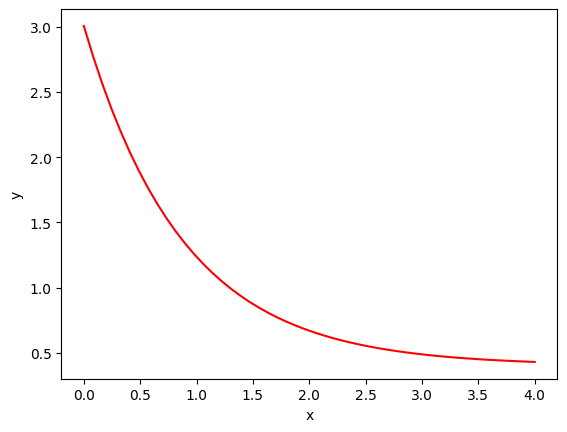

In [10]:
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:


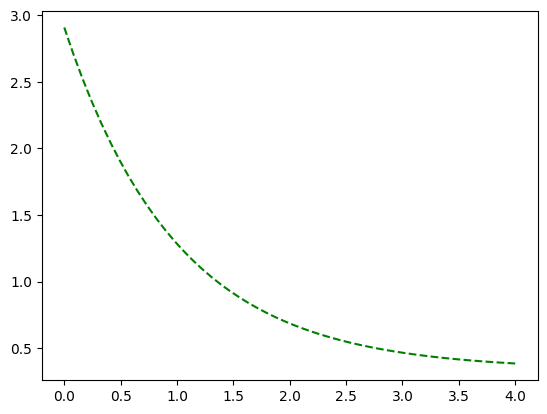

In [11]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

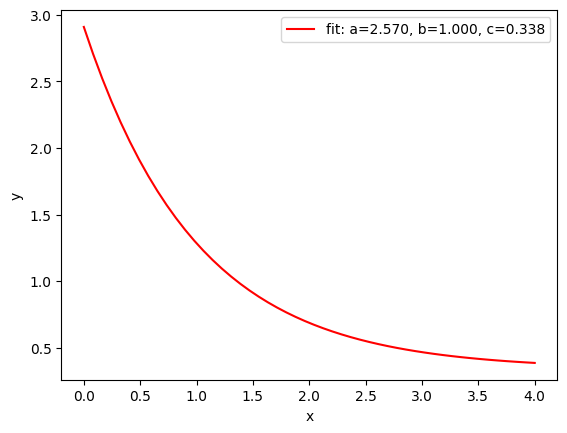

In [13]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()